# Tugas Praktikum 4 ML A1

Fadhail Athaillah Bima || 24060121140172


**Import Library**

Pertama, kita melakukan import library-library yang dibutuhkan dalam melakukan clustering

In [3]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

# 1. Agglomerative Clustering dengan Single Linkage dan Average Linkage untuk Dataset Random

**Melakukan Generate Random Data**

Kita akan menghasilkan satu set data menggunakan kelas make_blobs. Masukkan parameter ini
ke make_blobs:

a. n_samples: Jumlah total poin yang dibagi rata di antara cluster. Pilih nomor dari 10-1500.

b. centers: Jumlah pusat yang akan dihasilkan, atau lokasi pusat tetap. Pilih array koordinat x, y untuk menghasilkan pusat. Memiliki 1-10 pusat (mis. Pusat = [[1,1], [2,5]])

c. cluster_std: Deviasi standar dari cluster. Semakin besar angkanya, semakin jauh klusternya. Pilih angka antara 0,5-1,5

In [7]:
#Generate random data
X1, y1 = make_blobs(n_samples=100, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

**Plotting Random Data**


<function matplotlib.pyplot.show(close=None, block=None)>

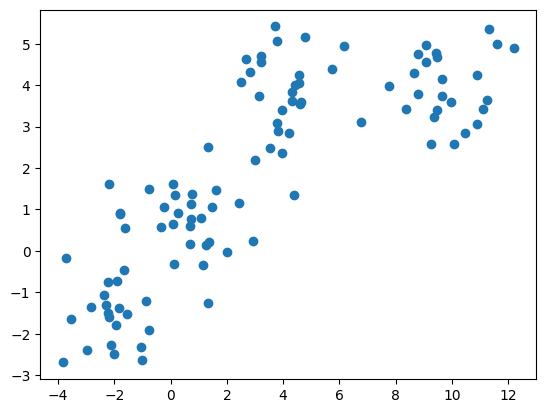

In [8]:
#Plot the scatter plot of the randomly generated data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')
plt.show

**Agglomerative Clustering**

Kelas Agglomerative Clustering akan membutuhkan dua masukan:

1.   n_clusters : Jumlah cluster yang akan dibentuk serta jumlah centroid yang akan dibuat. Nilainya akan menjadi: 4
2.   linkage : Kriteria linkage mana yang akan digunakan. Algoritma akan menggabungkan pasangan cluster yang meminimalkan kriteria ini. Nilainya akan menjadi: 'complete'



**Menggunakan Single Linkage**

Single Linkage merupakan teknik yang menggabungkan cluster-cluster menurut jarak antara anggota-anggota terdekat di antara dua cluster. Agglomerative Clustering untuk dataset random yang tersedia dengan single linkage dilakukan dengan code seperti di bawah.

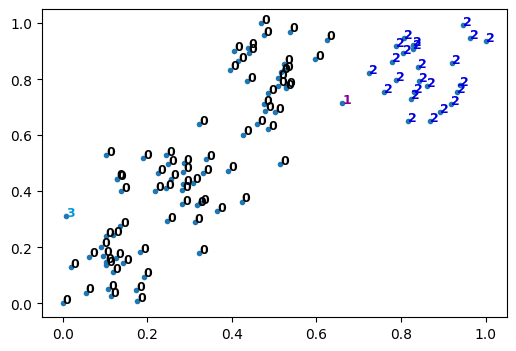

In [9]:
#Agglomerative Clustering Single Linkage
agglom_single = AgglomerativeClustering(n_clusters = 4, linkage = 'single')
agglom_single.fit(X1,y1)

#Plot the scatter plot of the randomly generated data

#Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

#Create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

#Get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

#Looping for display all of the datapoints
for i in range(X1.shape[0]):
  plt.text(X1[i, 0], X1[i, 1], str(agglom_single.labels_[i]),
           color=plt.cm.nipy_spectral(agglom_single.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size': 9})

#Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

**Menggunakan Average Linkage**

Average Linkage merupakan teknik yang menggabungkan cluster-cluster menurut jarak rata-rata pasangan anggota masing-masing pada himpunan antara dua cluster. Agglomerative Clustering untuk dataset random yang tersedia dengan average linkage dilakukan dengan code seperti di bawah.

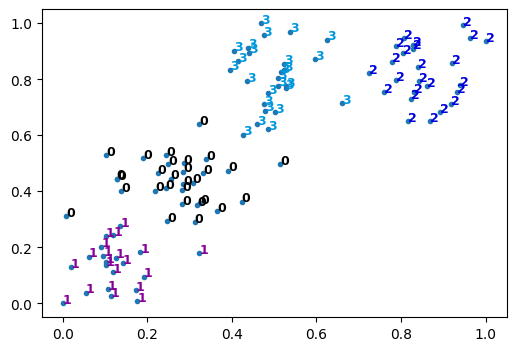

In [10]:
#Agglomerative Clustering Average Linkage
agglom_average = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom_average.fit(X1,y1)

#Plot the scatter plot of the randomly generated data

#Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

#Create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

#Get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

#Looping for display all of the datapoints
for i in range(X1.shape[0]):
  plt.text(X1[i, 0], X1[i, 1], str(agglom_average.labels_[i]),
           color=plt.cm.nipy_spectral(agglom_average.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size': 9})

#Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

**Plotting Dendrogram**

Matriks jarak berisi jarak dari setiap titik ke titik lain dari sebuah set data. Kemudian, kita menggunakan fungsi distance_matrix, yang membutuhkan dua input untuk menampilkan hasil matriks jarak. Kita menggunakan matriks fitur, X1 sebagai kedua input. Lalu matriks jarak akan disimpan ke variabel yang disebut dist_matrix. Nilai jarak disini adalah simetris, dengan diagonal 0.

In [11]:
# Distance Matrix
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.39773271 0.07354303 ... 0.82872016 0.84678391 0.10094667]
 [0.39773271 0.         0.45705013 ... 0.43292951 0.45128161 0.49374974]
 [0.07354303 0.45705013 0.         ... 0.88984423 0.90139684 0.03966527]
 ...
 [0.82872016 0.43292951 0.88984423 ... 0.         0.12567059 0.92616801]
 [0.84678391 0.45128161 0.90139684 ... 0.12567059 0.         0.93955563]
 [0.10094667 0.49374974 0.03966527 ... 0.92616801 0.93955563 0.        ]]


Selanjutnya, menggunakan kelas linkage dari hierarki dan memberikan parameter 'single' untuk single linkage dan 'average' untuk average linkage.

In [12]:
#Hierarchical Clustering
single = hierarchy.linkage(dist_matrix, 'single')
average = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-12-0f7aea4be65e>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-12-0f7aea4be65e>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  average = hierarchy.linkage(dist_matrix, 'average')


Hierarchical Clustering biasanya divisualisasikan sebagai dendrogram seperti dibawah ini. Kita akan menyimpan dendrogram ke variabel yang disebut dendro. Dalam melakukan ini, dendrogram juga akan ditampilkan.

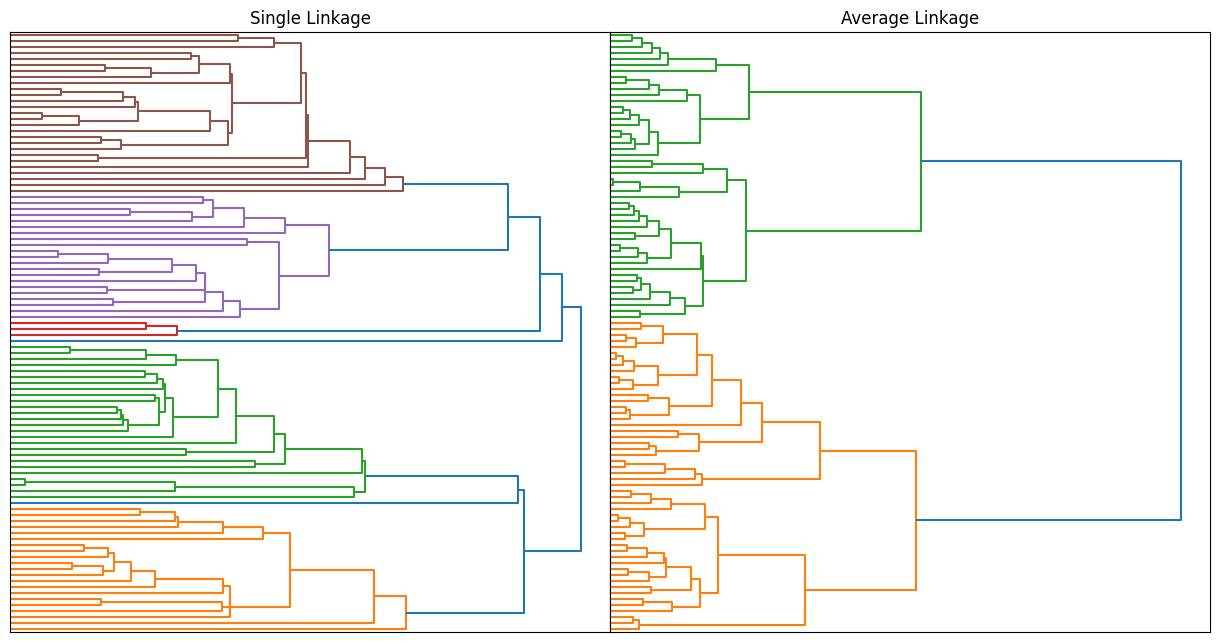

In [13]:
#Plot the dendrogram side-by-side
fig = plt.figure(figsize=(15,10))

#Single Linkage
#Give title and show the dendogram
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
Z1 = hierarchy.dendrogram(single, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title('Single Linkage')

#Average Linkage
#Give title and show the dendogram
ax2 = fig.add_axes([0.5,0.1,0.4,0.6])
Z12= hierarchy.dendrogram(average, orientation='right')
ax2.set_xticks([])
ax2.set_yticks([])
plt.title('Average Linkage')

plt.show()

**Perbedaan Single Linkage dan Average Linkage**
*   Pada Single Linkage biasanya cenderung terpecah menjadi 2 cluster.
*   Pada Average Linkage, data terpecah menjadi 4 cluster dengan jumlah tiap cluster yang merata.
*   Single Linkage cepat dan dapat bekerja dengan baik pada data non-globular, tetapi berkinerja buruk dengan adanya noise.
*   Average Linkage bekerja dengan baik pada globular cluster yang terpisah dengan bersih, tetapi sebaliknya memiliki hasil yang beragam.







# 2. Agglomerative Clustering Menggunakan Scipy dan Scikit-Learn dengan Single Linkage dan Average Linkage untuk Dataset cars_clustering

**Memuat Dataset**

Untuk memuat dataset, dilakukan upload dataset terlebih dahulu pda files di google colab. Lalu, untuk membaca dataset digunakan fungsi read_csv(). Data yang telah dibaca disimpan pada variabel pdf. Lalu, kita juga melihat dimensi dataset dan pada hasil dibawah menunjukkan bahwa dimensi dari dataset terdefinisi memiliki 159 sampel data dan 16 atribut data. Kemudian ditampilkan beberapa baris data menggunakan fungsi head().

In [14]:
#Import and read dataset
pdf = pd.read_csv('cars_clus.csv')

#Show dataset
print(pdf.shape)

#Show head
pdf.head()

(159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


**Cleaning Data**

menghapus dataset dengan membuang baris yang memiliki nilai null.

In [15]:
#Data Cleaning (convert to numerical, if can't drop the data)
pdf[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head()

Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


**Feature Selection**

Memilih beberapa feature yang akan dipakai dan disini kita memilih untuk memakai 8 atribut. Lalu, ditampilkan beberapa data menggunakan fungsi head().

In [16]:
#Feature selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


**Normalization**

Sekarang kita dapat menormalkan set fitur. MinMaxScaler mengubah fitur dengan menskalakan
setiap fitur ke kisaran tertentu. Ini secara default (0, 1). Artinya, penaksir ini menskalakan dan
menerjemahkan setiap fitur secara individual sehingga berada di antara nol dan satu.

In [17]:
from sklearn.preprocessing import MinMaxScaler

#Normalize the dataset
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

# Agglomerative Clustering Menggunakan Scipy

Dalam agglomerative clustering, pada setiap iterasi, algoritme harus memperbarui matriks jarak
untuk mencerminkan jarak cluster yang baru terbentuk dengan cluster yang tersisa di hutan.
Metode berikut ini didukung di Scipy untuk menghitung jarak antara cluster yang baru terbentuk
dan masing-masing: - single - complete - average - weighted – centroid

In [18]:
#Agglomerative Clustering with Scipy

#Import library
import scipy
import scipy.cluster.hierarchy

leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

# Single Linkage
cars_single = hierarchy.linkage(D, 'single')
# Average Linkage
cars_average = hierarchy.linkage(D, 'average')

<ipython-input-18-1e6cd1929c63>:8: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])
<ipython-input-18-1e6cd1929c63>:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cars_single = hierarchy.linkage(D, 'single')
<ipython-input-18-1e6cd1929c63>:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cars_average = hierarchy.linkage(D, 'average')


Pada dasarnya, pengelompokkan hierarki tidak memerlukan jumlah cluster yang telah ditentukan sebelumnya. Namun, dalam beberapa aplikasi kami menginginkan partisi dari cluster terputus-putus seperti di clustering datar.

In [19]:
#Fcluster
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(cars_single, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
clusters = fcluster(cars_average, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

**Plotting Dendrogram**

Hierarchical Clustering biasanya divisualisasikan sebagai dendrogram seperti dibawah ini.

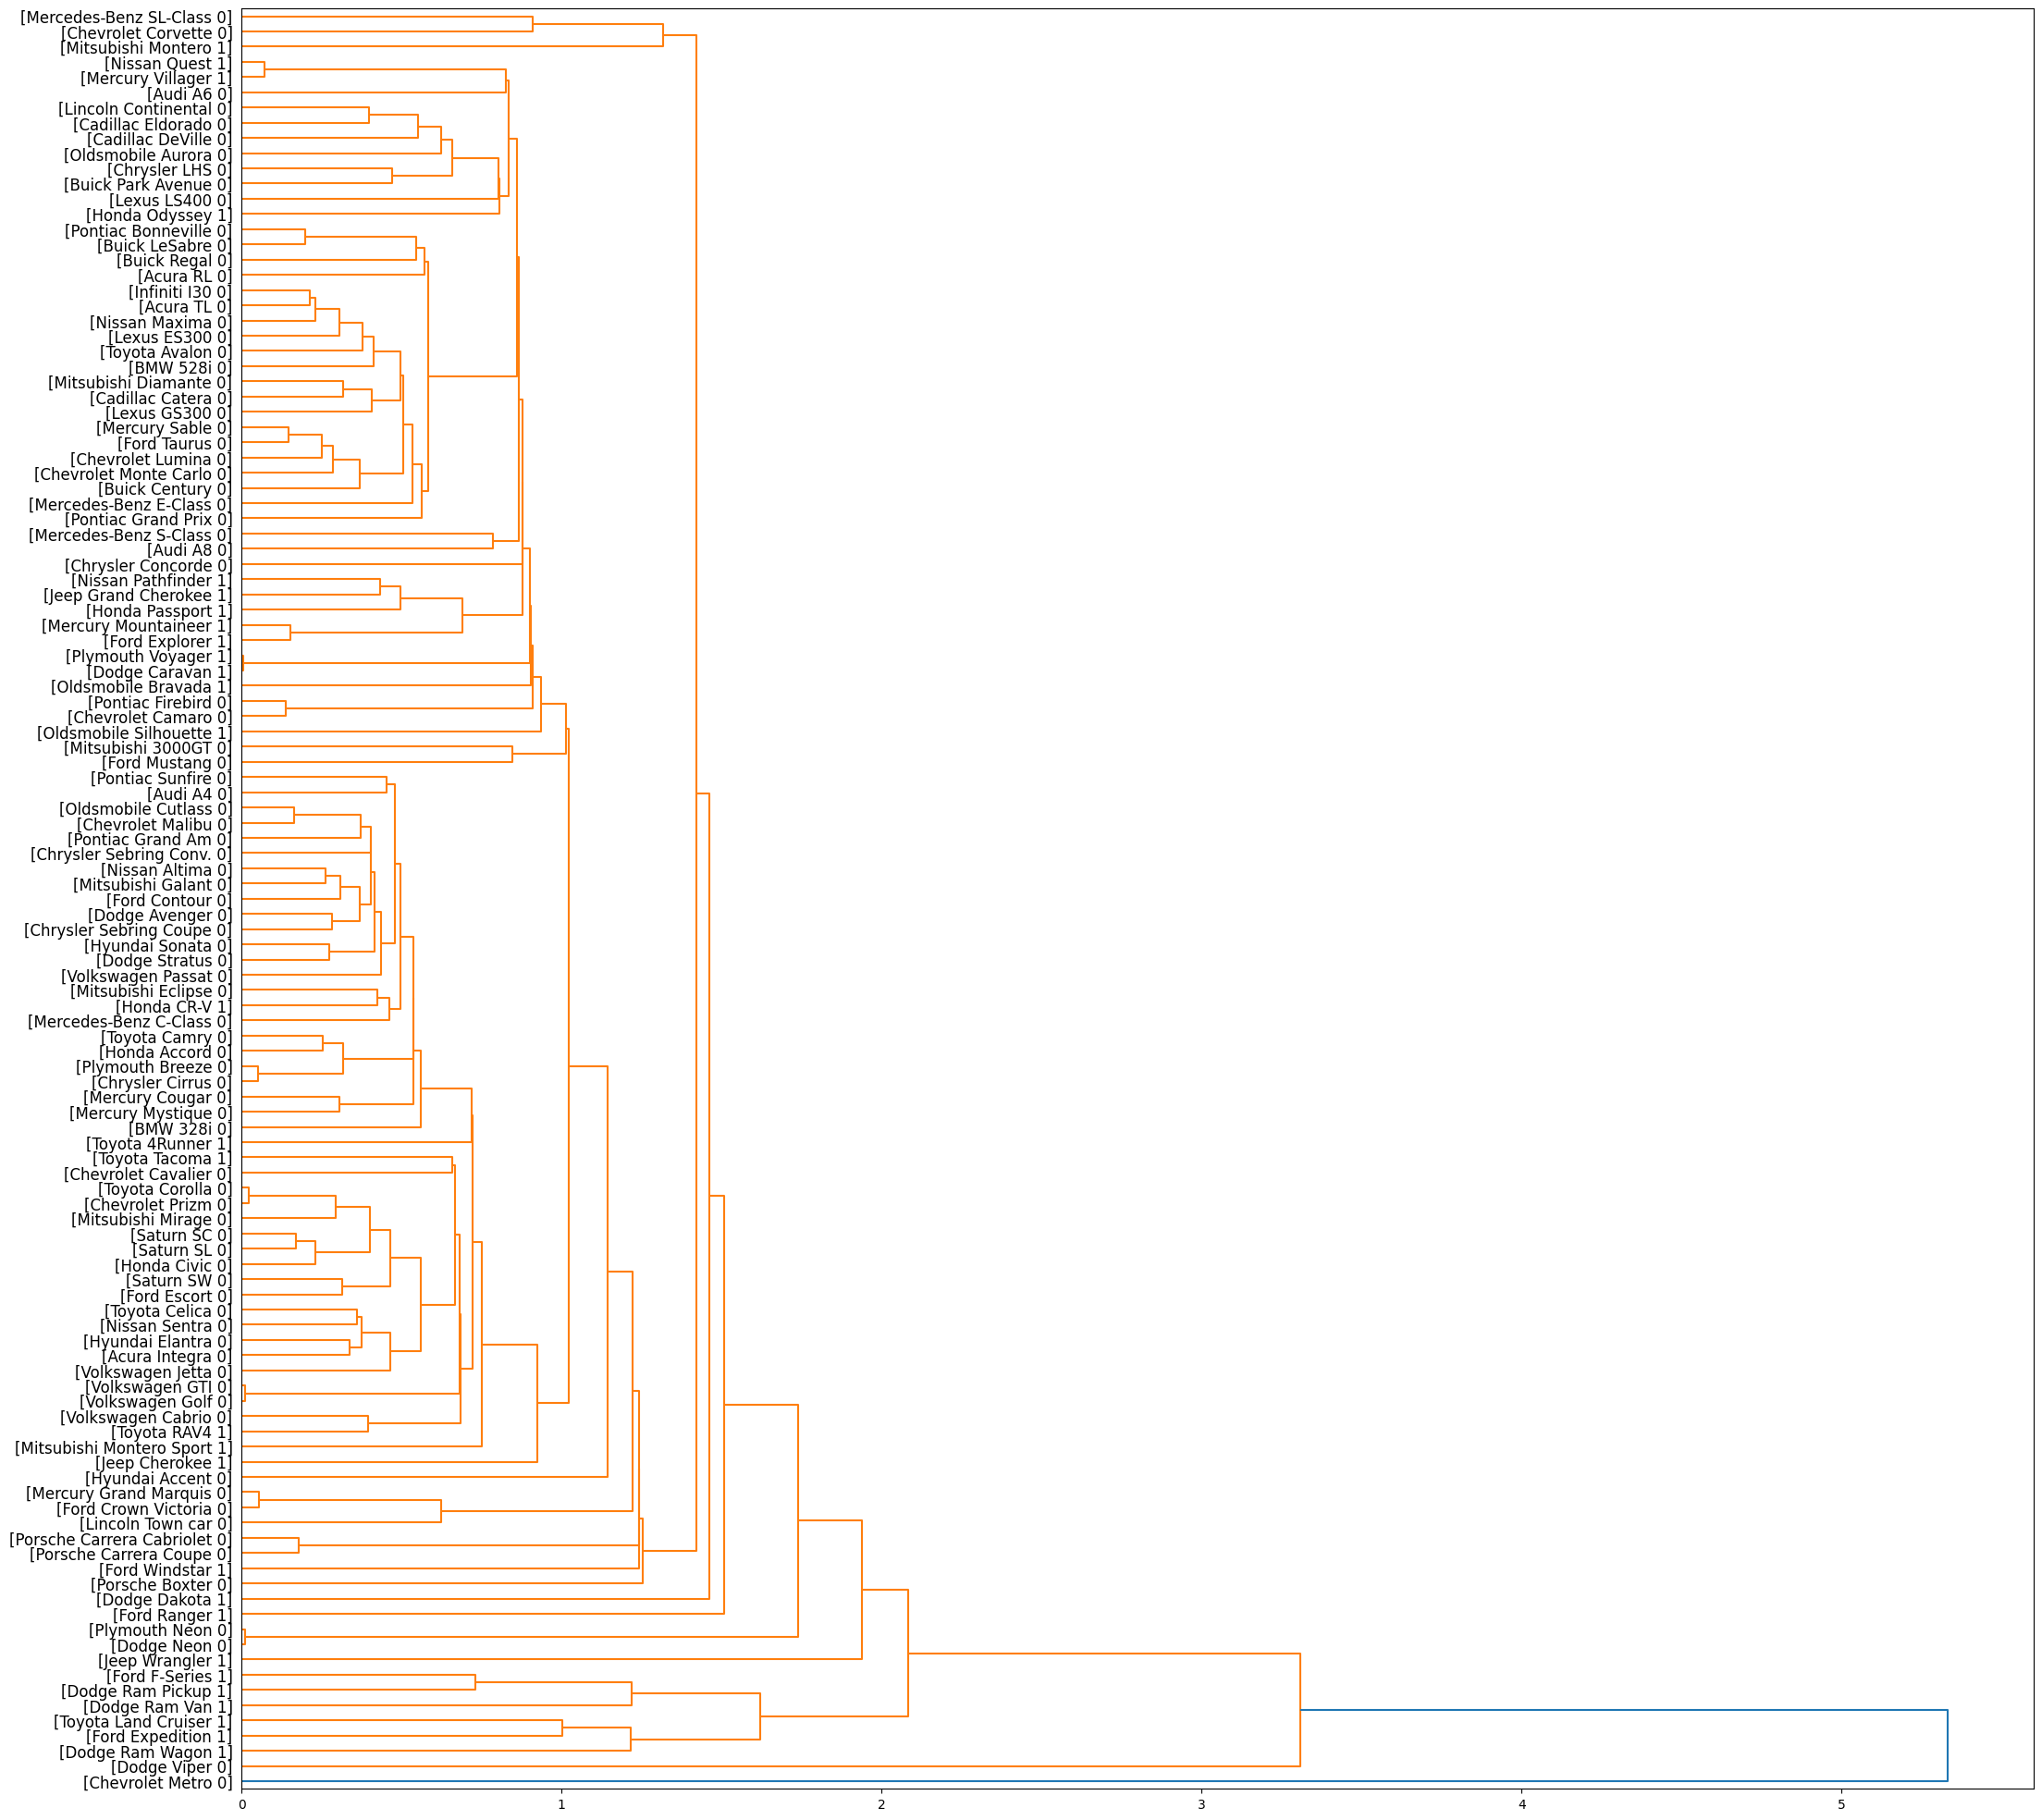

In [21]:
#Plot the dendogram single linkage
fig = plt.figure(figsize=(25,25))
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))
# Membuat dendrogram
dendro = hierarchy.dendrogram(cars_single, leaf_label_func = llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

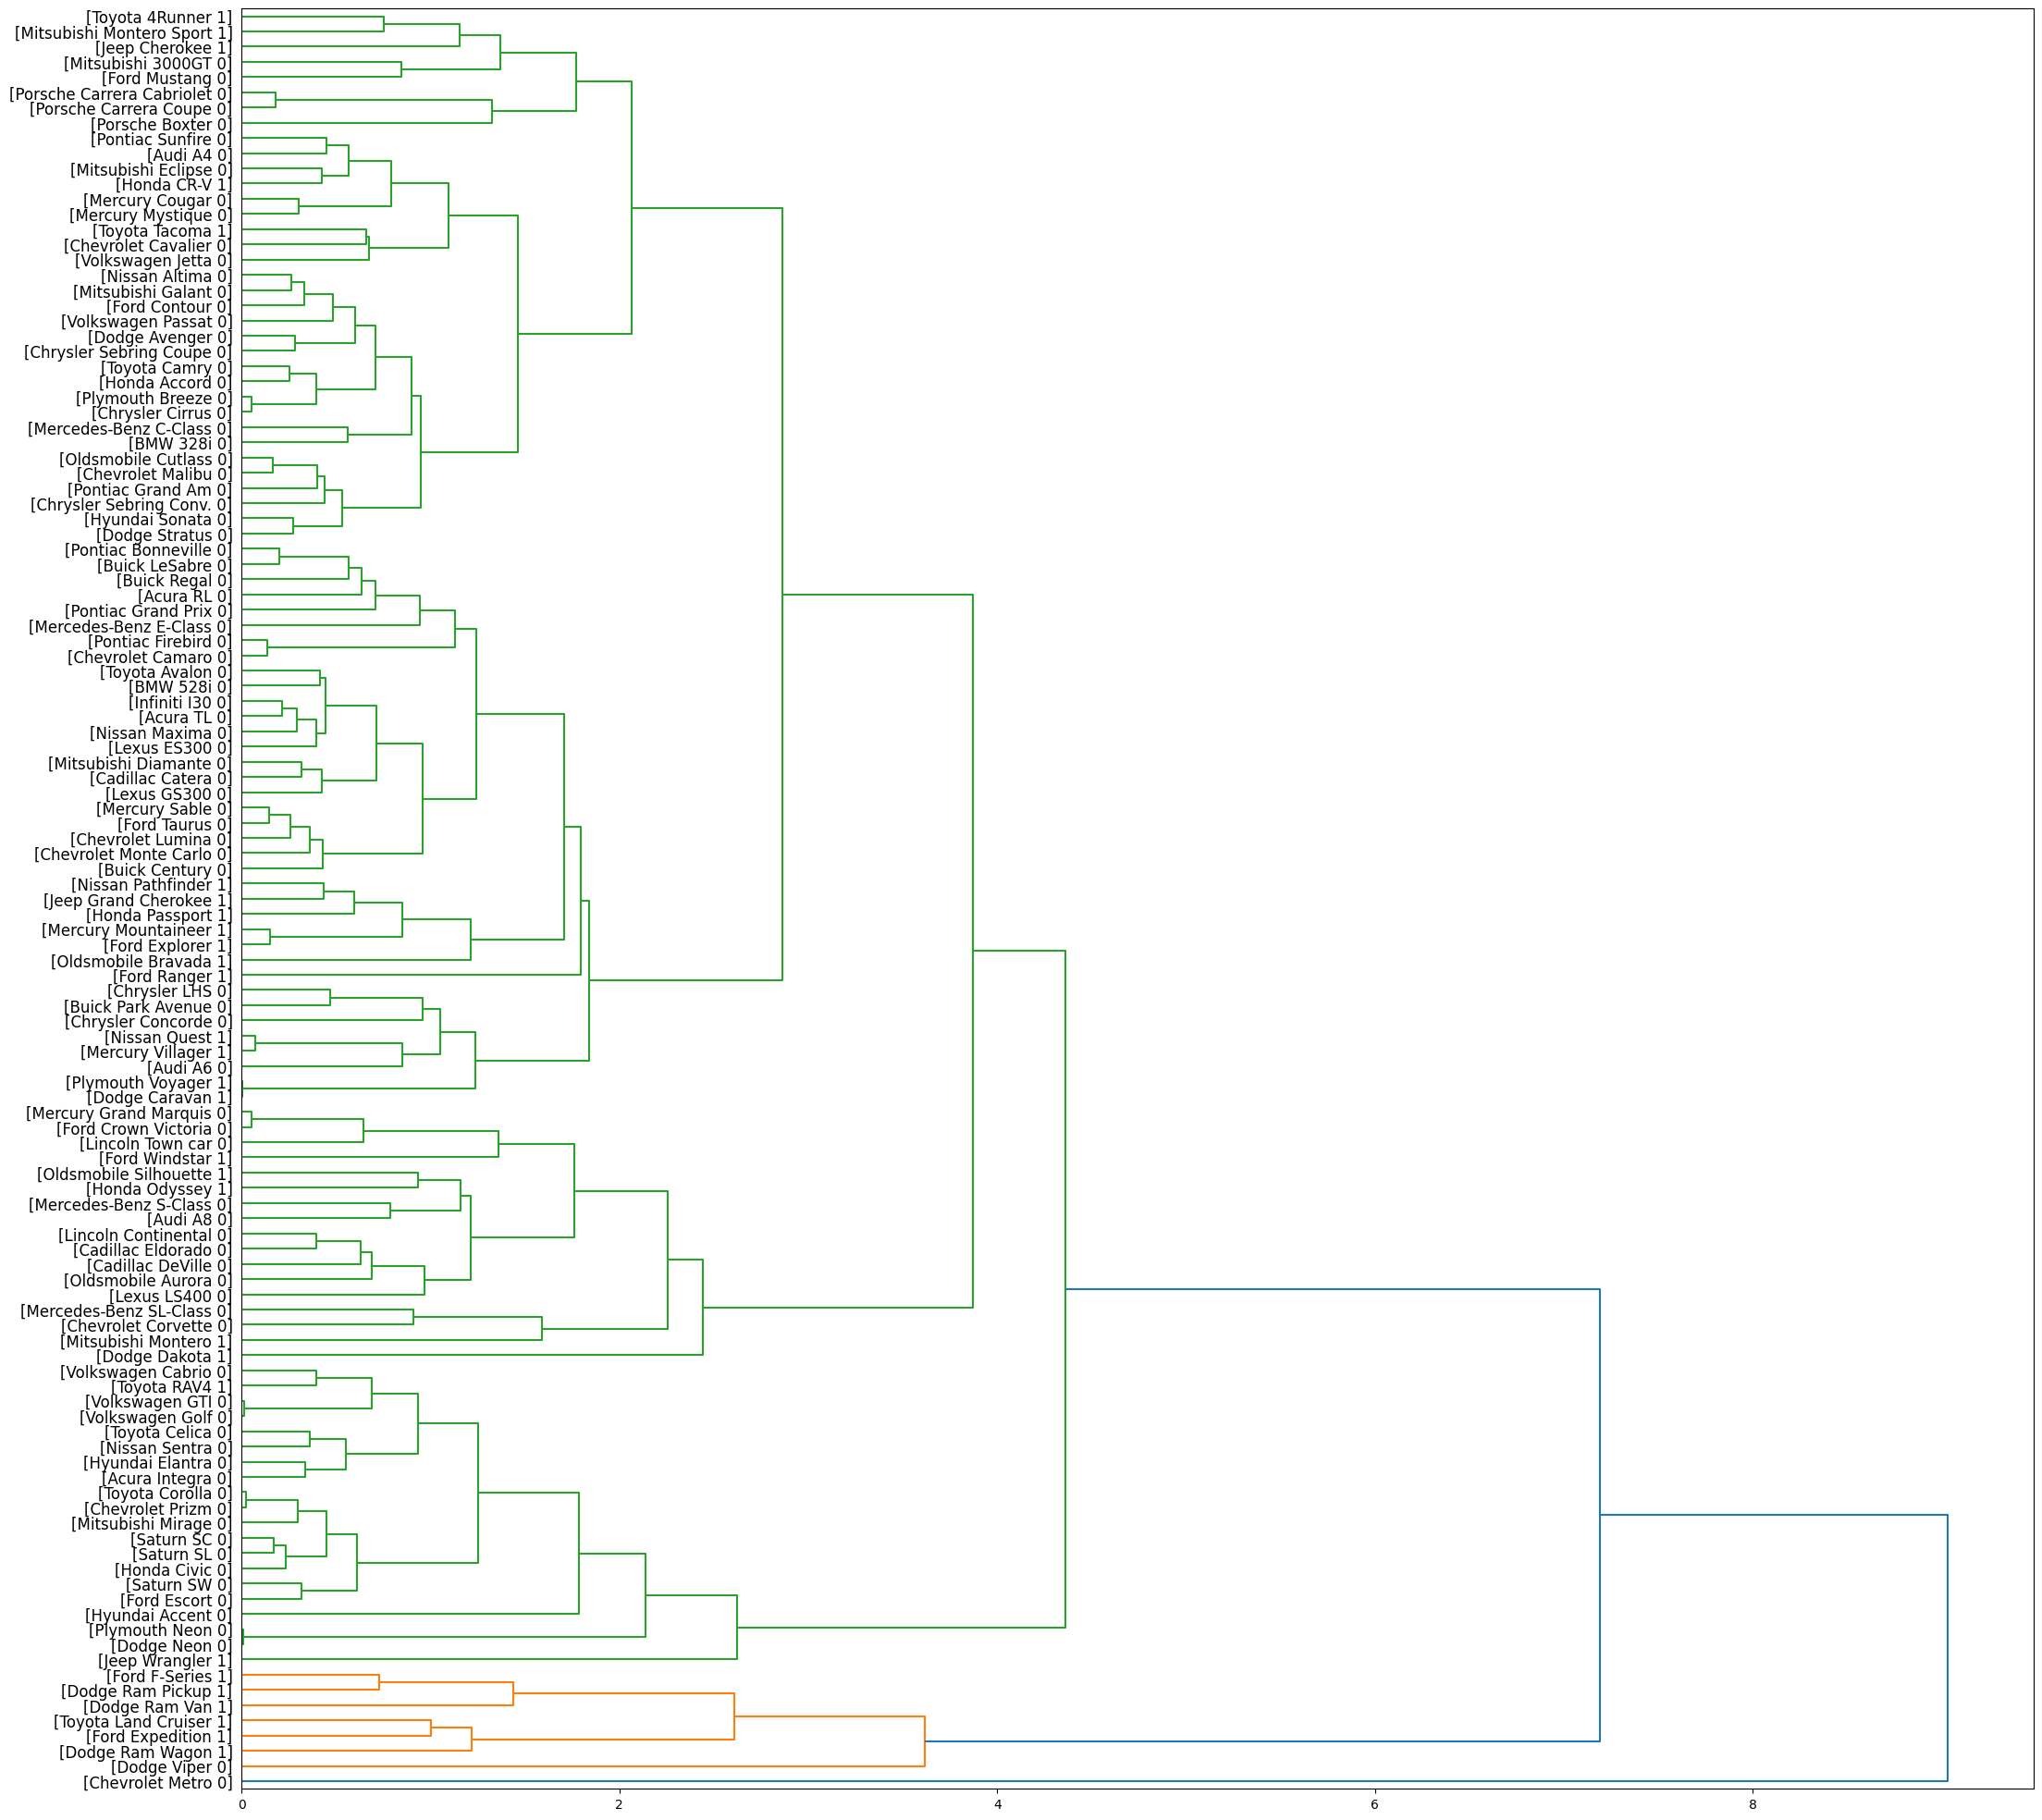

In [22]:
#Plot the dendrogram single linkage
fig = plt.figure(figsize=(25,25))
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))
# Membuat dendrogram
dendro = hierarchy.dendrogram(cars_average, leaf_label_func = llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

**Perbedaan Agglomerative Clustering Menggunakan Scipy dengan Single Linkage dan Average Linkage**

Metode agglomerative clustering memiliki variasi dalam cara menghitung jarak antar cluster. Single Linkage menggabungkan cluster berdasarkan jarak minimum antara satu objek dalam satu cluster dengan objek terdekat dalam cluster lain, cenderung menghasilkan kelompok yang panjang. Sementara Average Linkage menggunakan rata-rata jarak antara semua pasangan objek dari kedua cluster yang akan digabungkan, cenderung menghasilkan kelompok yang lebih seimbang dalam ukuran dan homogen.

# Agglomerative Clustering Menggunakan Scikit-Learn

fungsi 'AgglomerativeClustering' dari scikit-learn library untuk
mengelompokkan dataset. AgglomerativeClustering melakukan pengelompokan hierarkis menggunakan pendekatan bottom-up.

Peratama kita menghitung matriks jarak menggunakan fungsi distance_matrix, yang membutuhkan dua input untuk menampilkan hasil matriks jarak. Matriks jarak akan berisi jarak dari setiap titik ke titik lain dari sebuah set data.

In [23]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Selanjutnya, menggunakan fungsi AgglomerativeClustering dan memberikan parameter 'single' untuk single linkage dan 'average' untuk average linkage.

In [24]:
single_agg = AgglomerativeClustering(n_clusters = 6, linkage = 'single').fit(feature_mtx)
avg_agg = AgglomerativeClustering(n_clusters = 6, linkage = 'average').fit(feature_mtx)
# Melakukan clustering
single_agg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [25]:
avg_agg.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

Melakukan copy dataframe dan menambahkan field baru ke dataframe untuk menunjukkan cluster dari setiap baris.

In [26]:
#Copy the dataframe
single_pdf = pdf.copy(deep=True)
avg_pdf = pdf.copy(deep=True)

#Add the new class to the dataframe
single_pdf['cluster_'] = single_agg.labels_
avg_pdf['cluster_'] = avg_agg.labels_

single_pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


In [27]:
avg_pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


In [28]:
single_pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [29]:
avg_pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [30]:
single_pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()

<ipython-input-30-389e05938d11>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

In [31]:
avg_pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()

<ipython-input-31-6a85cb316abb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

**Plotting Dendrogram**

Hierarchical Clustering biasanya divisualisasikan sebagai dendrogram seperti dibawah ini.

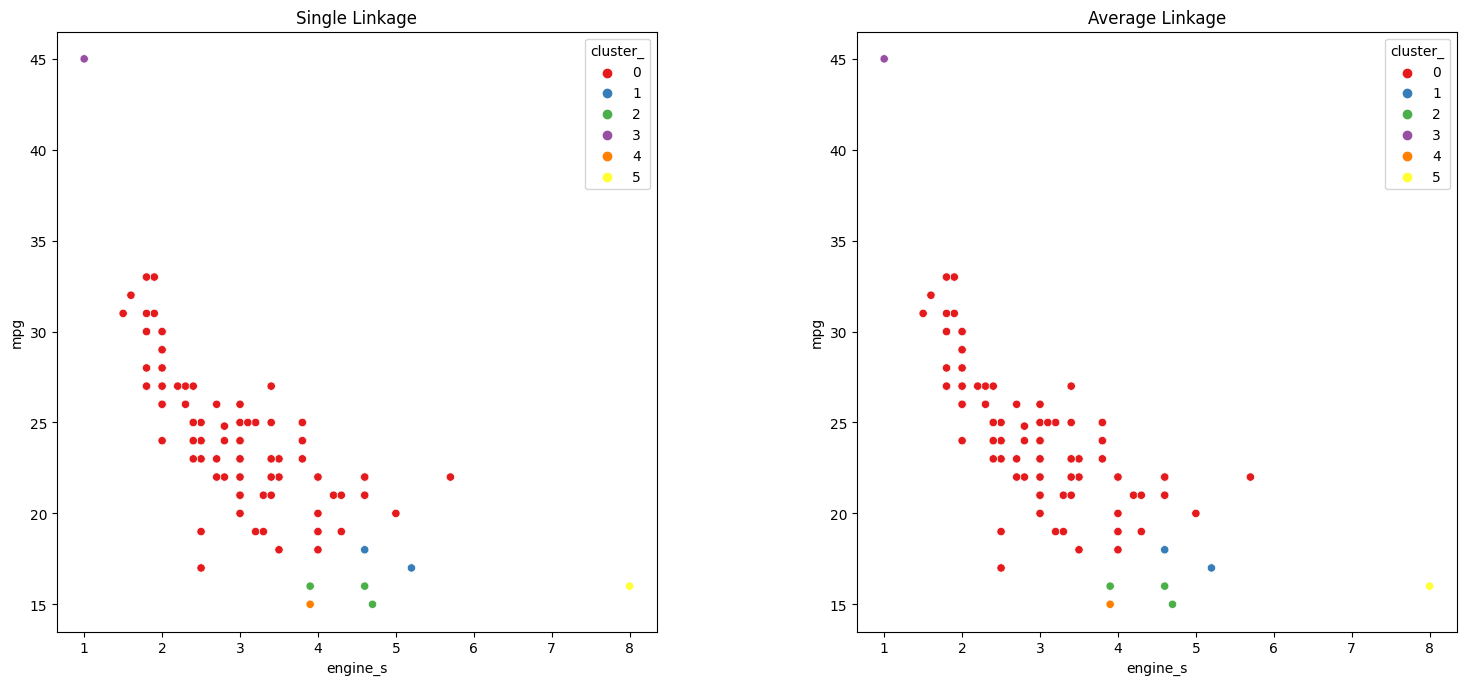

In [32]:
#import sns
import seaborn as sns

#Plot single_df and avg_df side-by-side
fig = plt.figure(figsize=(20,10))

#Single Linkage
#Give title and show the dendrogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='engine_s', y='mpg', hue='cluster_', data=single_pdf, palette='Set1')
ax1.set_title('Single Linkage')

#Average Linkage
#Give title and show the dendrogram
ax1 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='engine_s', y='mpg', hue='cluster_', data=single_pdf, palette='Set1')
ax1.set_title('Average Linkage')
plt.show()

**Perbedaan Agglomerative Clustering Menggunakan Scikit-Learn dengan Single Linkage dan Average Linkage**

Dalam Scikit-Learn, metode Agglomerative Clustering dapat menggunakan Single Linkage atau Average Linkage. Single Linkage menggabungkan cluster berdasarkan jarak minimum antara satu titik dalam satu cluster dengan titik terdekat dalam cluster lain, sementara Average Linkage menggabungkan cluster dengan mempertimbangkan rata-rata jarak antara semua pasangan titik dari kedua cluster. Perbedaan utamanya terletak pada parameter linkage yang digunakan saat membuat objek AgglomerativeClustering.

# 3. Agglomerative Clustering Menggunakan Scipy dan Scikit-Learn dengan Single Linkage, Average Linkage, dan Complete Linkage untuk Dataset Iris

**Memuat Dataset**

Pertama, kita memuat dataset iris dengan load_iris().

In [34]:
#Import iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

Kemudian kita melakukan convert dataset serta menambahkan kolom baru, yaitu kolom target.

In [35]:
#Convert dataset
pdf = pd.DataFrame(iris.data, columns=iris.feature_names)
pdf['target'] = iris.target

Untuk menampilkan beberapa baris data pertama (teratas) dari dataset, dilakukan perintah head().

In [36]:
pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Menormalkan dataset dengan fungsi MinMaxScaler(). MinMaxScaler akan mengubah fitur dengan menskalakan setiap fitur ke kisaran tertentu.

In [37]:
#Normalize the dataset
x = pdf.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

Lalu, kita melakukan aglomerative clustering menggunakan scipy dengan single linkage, average linkage, dan complete linkage.

In [38]:
#Agglomerative Clustering with Scipy
import scipy
import scipy.cluster.hierarchy

leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

#Single Linkage
Z_single = hierarchy.linkage(D, 'single')

#Average Linkage
Z_avg = hierarchy.linkage(D, 'average')

#Complete Linkage
Z_complete = hierarchy.linkage(D, 'complete')

<ipython-input-38-48cdc041baf3>:6: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])
<ipython-input-38-48cdc041baf3>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(D, 'single')
<ipython-input-38-48cdc041baf3>:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_avg = hierarchy.linkage(D, 'average')
<ipython-input-38-48cdc041baf3>:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_complete = hierarchy.linkage(D, 'complete')


Hierarchical Clustering biasanya divisualisasikan sebagai dendrogram seperti dibawah ini.

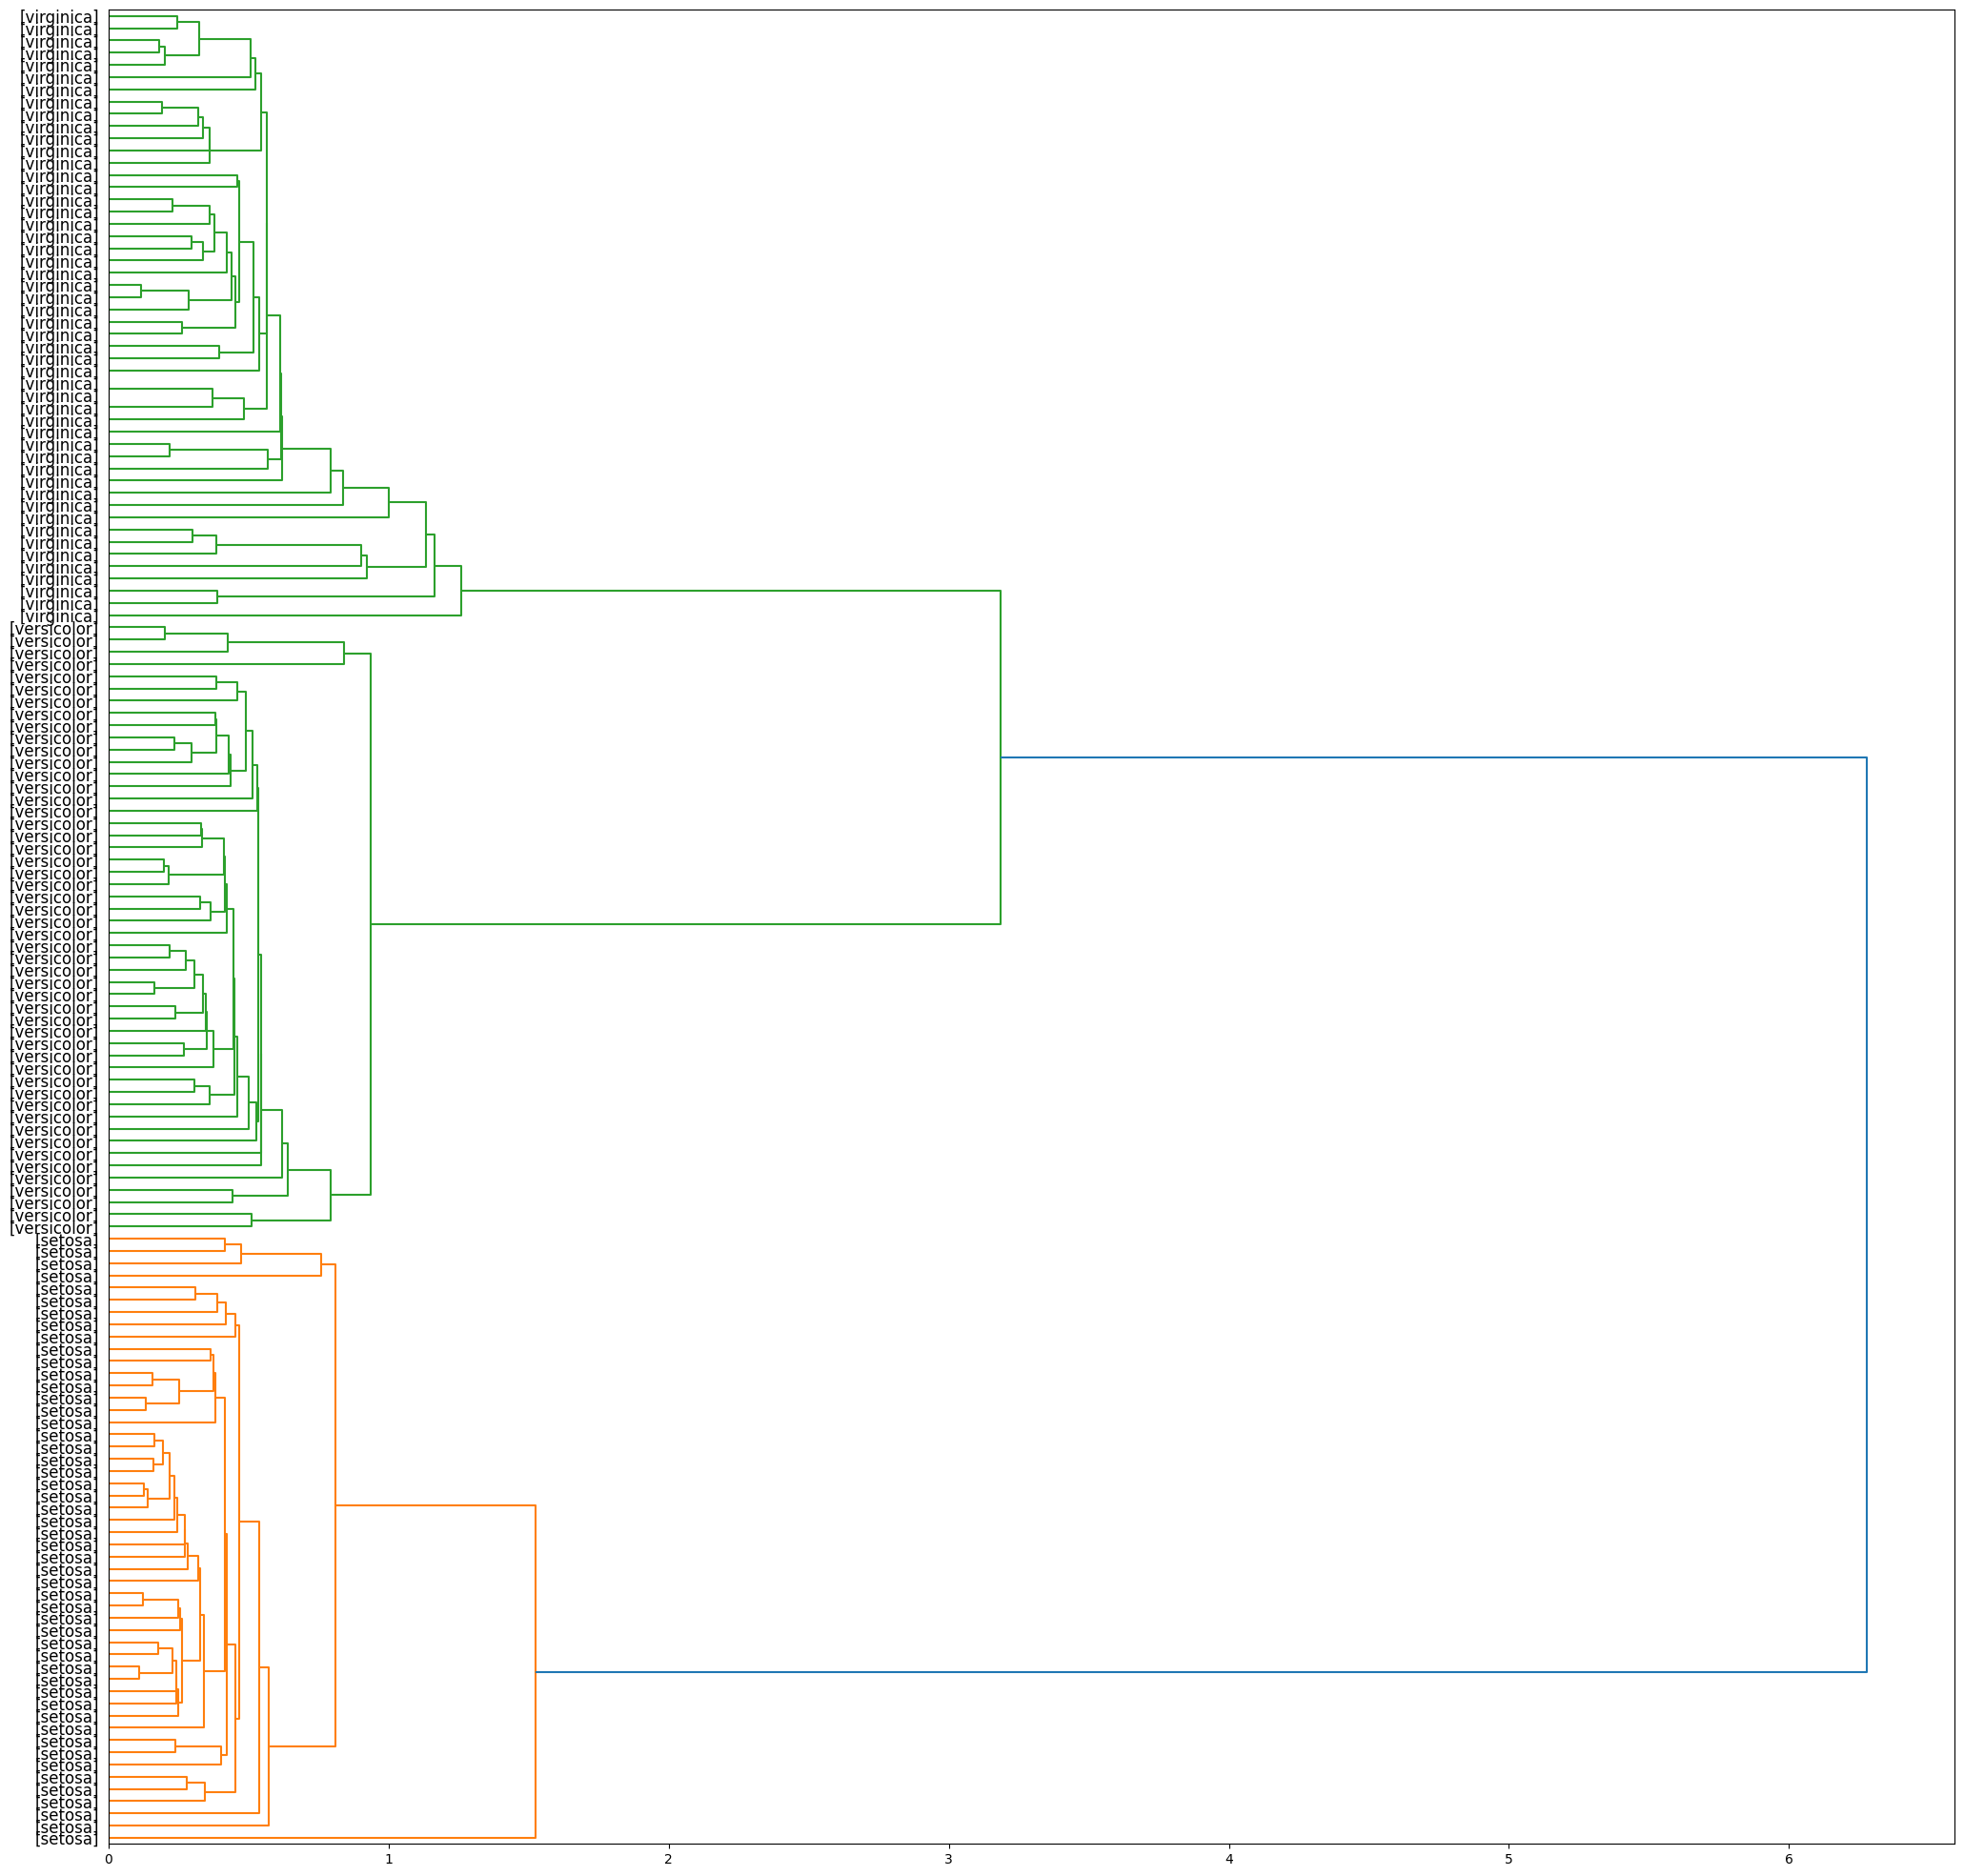

In [39]:
#Plot the dendrogram
def llf(id):
  return '[%s]' % (iris.target_names[pdf['target'][id]])

fig = plt.figure(figsize=(25,25))
dendro = hierarchy.dendrogram(Z_single, leaf_label_func=llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

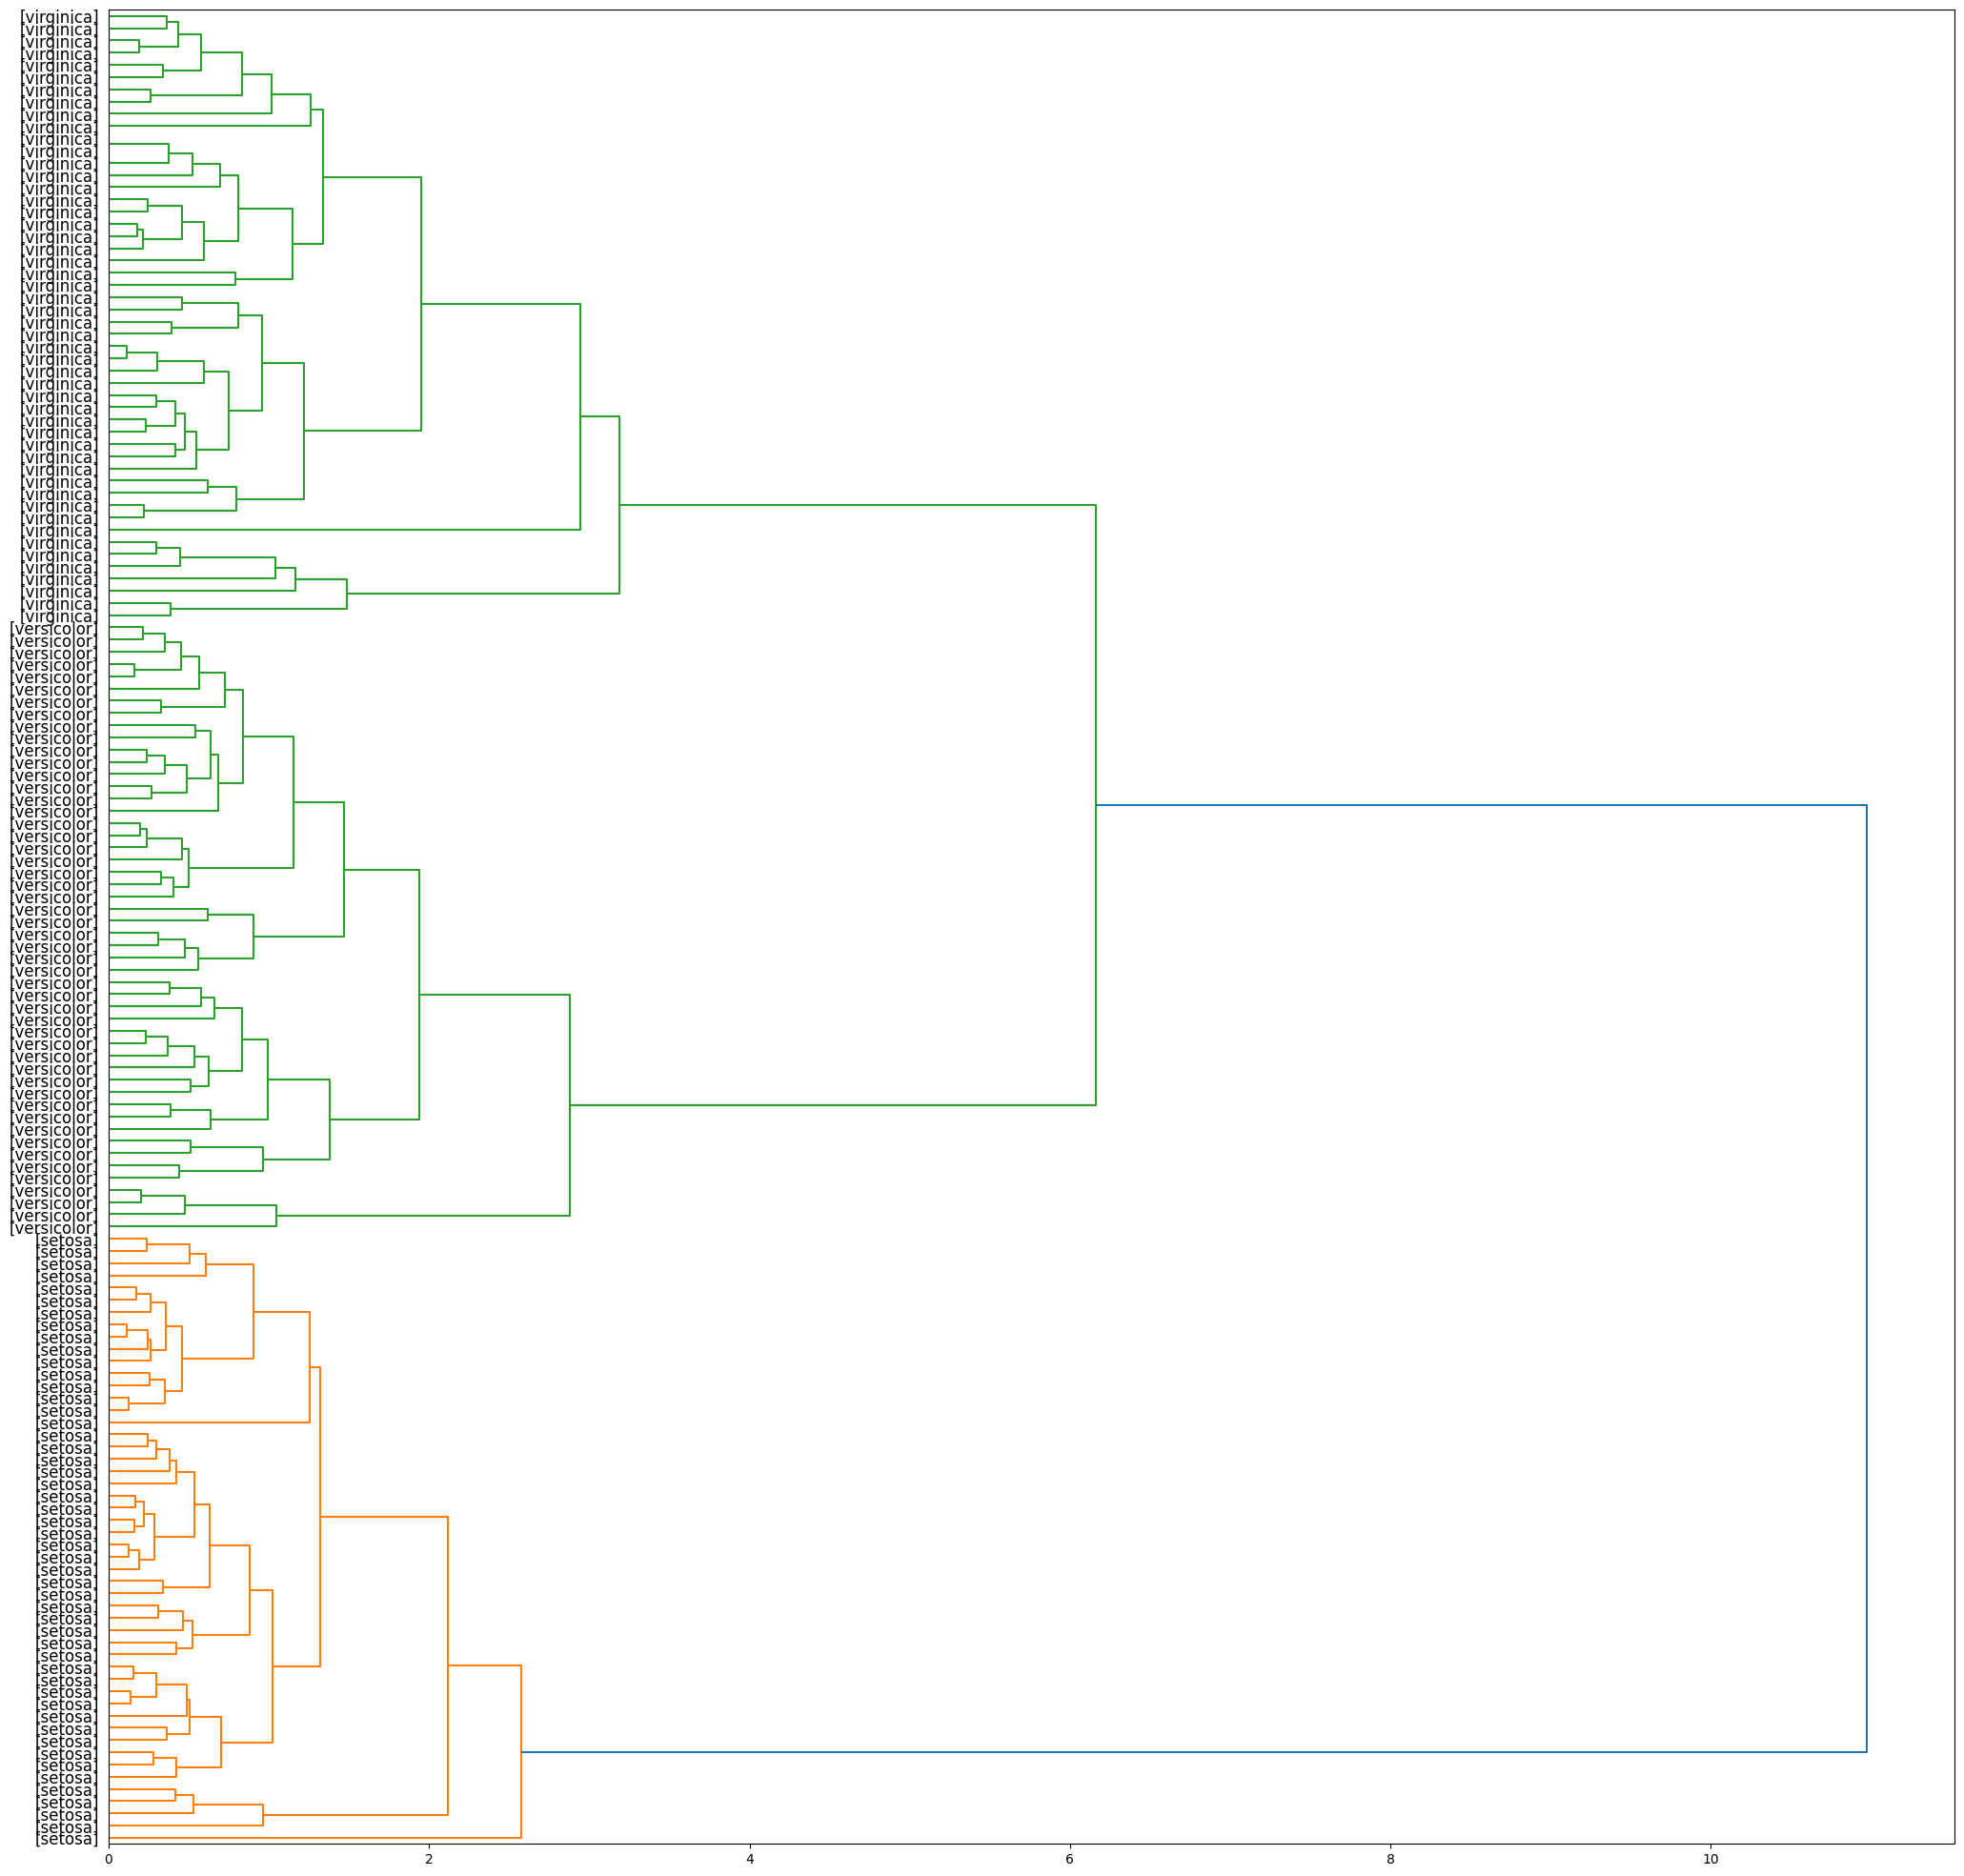

In [40]:
fig = plt.figure(figsize=(25,25))
dendro = hierarchy.dendrogram(Z_avg, leaf_label_func=llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

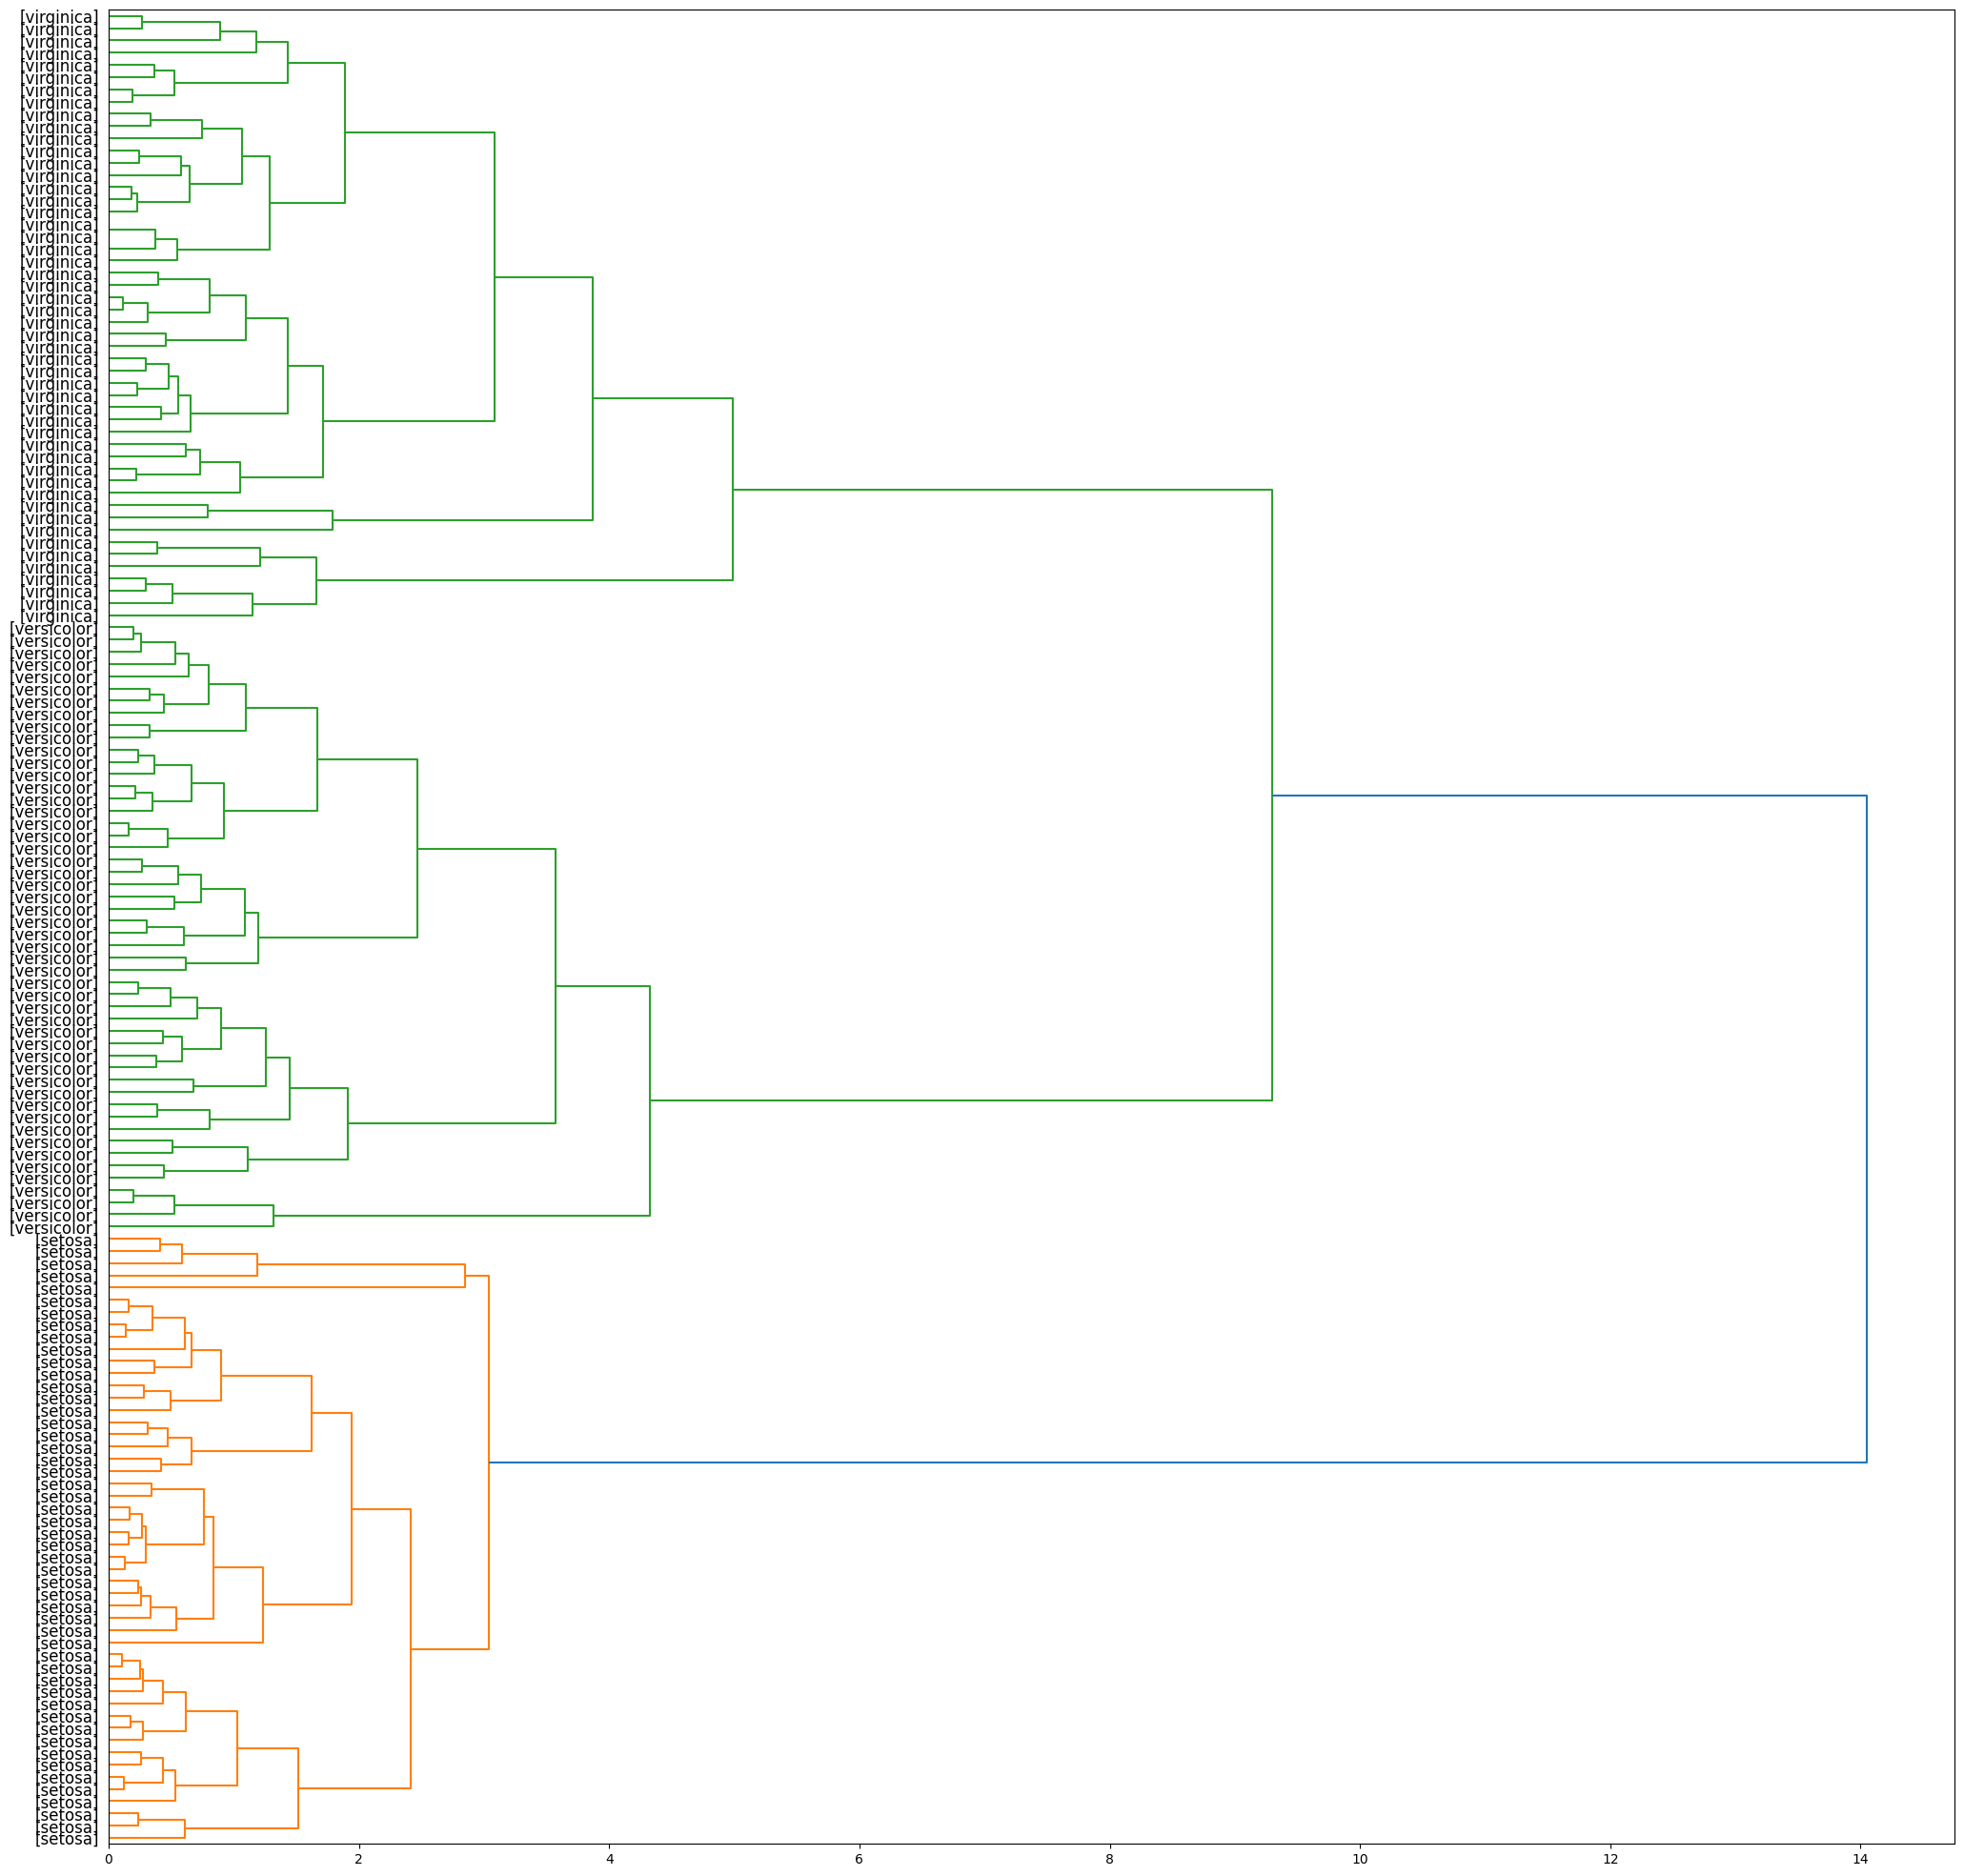

In [41]:
fig = plt.figure(figsize=(25,25))
dendro = hierarchy.dendrogram(Z_complete, leaf_label_func=llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Kita juga melakukan aglomerative clustering menggunakan scikit-learn dengan single linkage, average linkage, dan complete linkage.

In [42]:
#Agglomerative Clustering with Scikit-Learn
from sklearn.cluster import AgglomerativeClustering

#Single Linkage
single_agglo_clust = AgglomerativeClustering(n_clusters = 3, linkage = 'single')
single_agglo_clust.fit(feature_mtx)

#Average Linkage
avg_agglo_clust = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
avg_agglo_clust.fit(feature_mtx)

#Complete Linkage
complete_agglo_clust = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
complete_agglo_clust.fit(feature_mtx)

print("Single Linkage")
print(single_agglo_clust.labels_)
print("="*75)
print("Average Linkage")
print(avg_agglo_clust.labels_)
print("="*75)
print("Complete Linkage")
print(complete_agglo_clust.labels_)

Single Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Average Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Complete Linkage
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 1 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 1 2 2 2 1 2
 2 1]


In [43]:
#Copy the dataframe
single_pdf = pdf.copy(deep=True)
avg_pdf = pdf.copy(deep=True)
complete_pdf = pdf.copy(deep=True)

#Add the new class to the dataframe
single_pdf['cluster_'] = single_agglo_clust.labels_
avg_pdf['cluster_'] = avg_agglo_clust.labels_
complete_pdf['cluster_'] = complete_agglo_clust.labels_

single_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [44]:
avg_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [45]:
complete_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [46]:
single_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()

<ipython-input-46-08a970e680ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


In [47]:
single_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [48]:
avg_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()

<ipython-input-48-5f8fcd535870>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


In [49]:
avg_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [50]:
complete_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()

<ipython-input-50-1340384f1ff3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  complete_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target                                                           
0        0                5.006000             3.428           1.462000   
1        1                5.936000             2.770           4.260000   
         2                6.055000             2.740           5.130000   
2        2                6.943333             3.130           5.833333   

                 petal width (cm)  
cluster_ target                    
0        0               0.246000  
1        1               1.326000  
         2               1.815000  
2        2               2.166667

In [51]:
complete_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         0         50
1         1         50
          2         20
2         2         30
Name: cluster_, dtype: int64

Hierarchical Clustering biasanya divisiualisasikan sebagai dendrogram seperti dibawah ini.

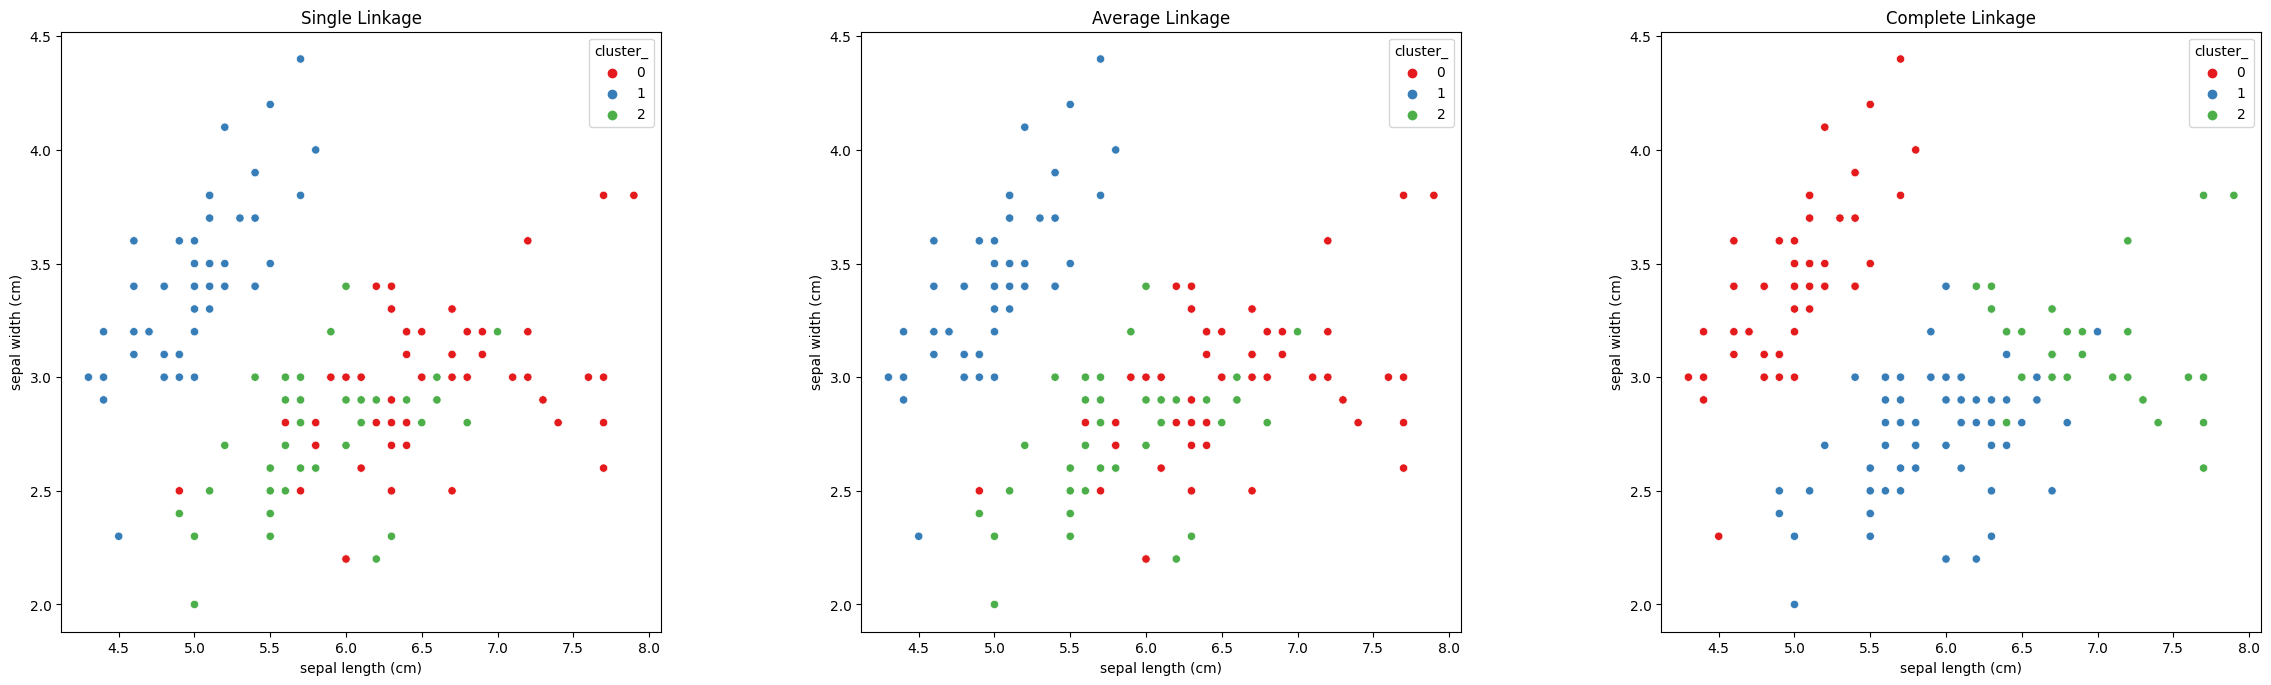

In [52]:
#Plot cluster
fig = plt.figure(figsize=(20,10))

#Single Linkage
#Give title and show the dendrogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=single_pdf, palette='Set1')
ax1.set_title('Single Linkage')

#Average Linkage
#Give title and show the dendrogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=avg_pdf, palette='Set1')
ax2.set_title('Average Linkage')

#Complete Linkage
#Give title and show the dendrogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=complete_pdf, palette='Set1')
ax3.set_title('Complete Linkage')
plt.show()

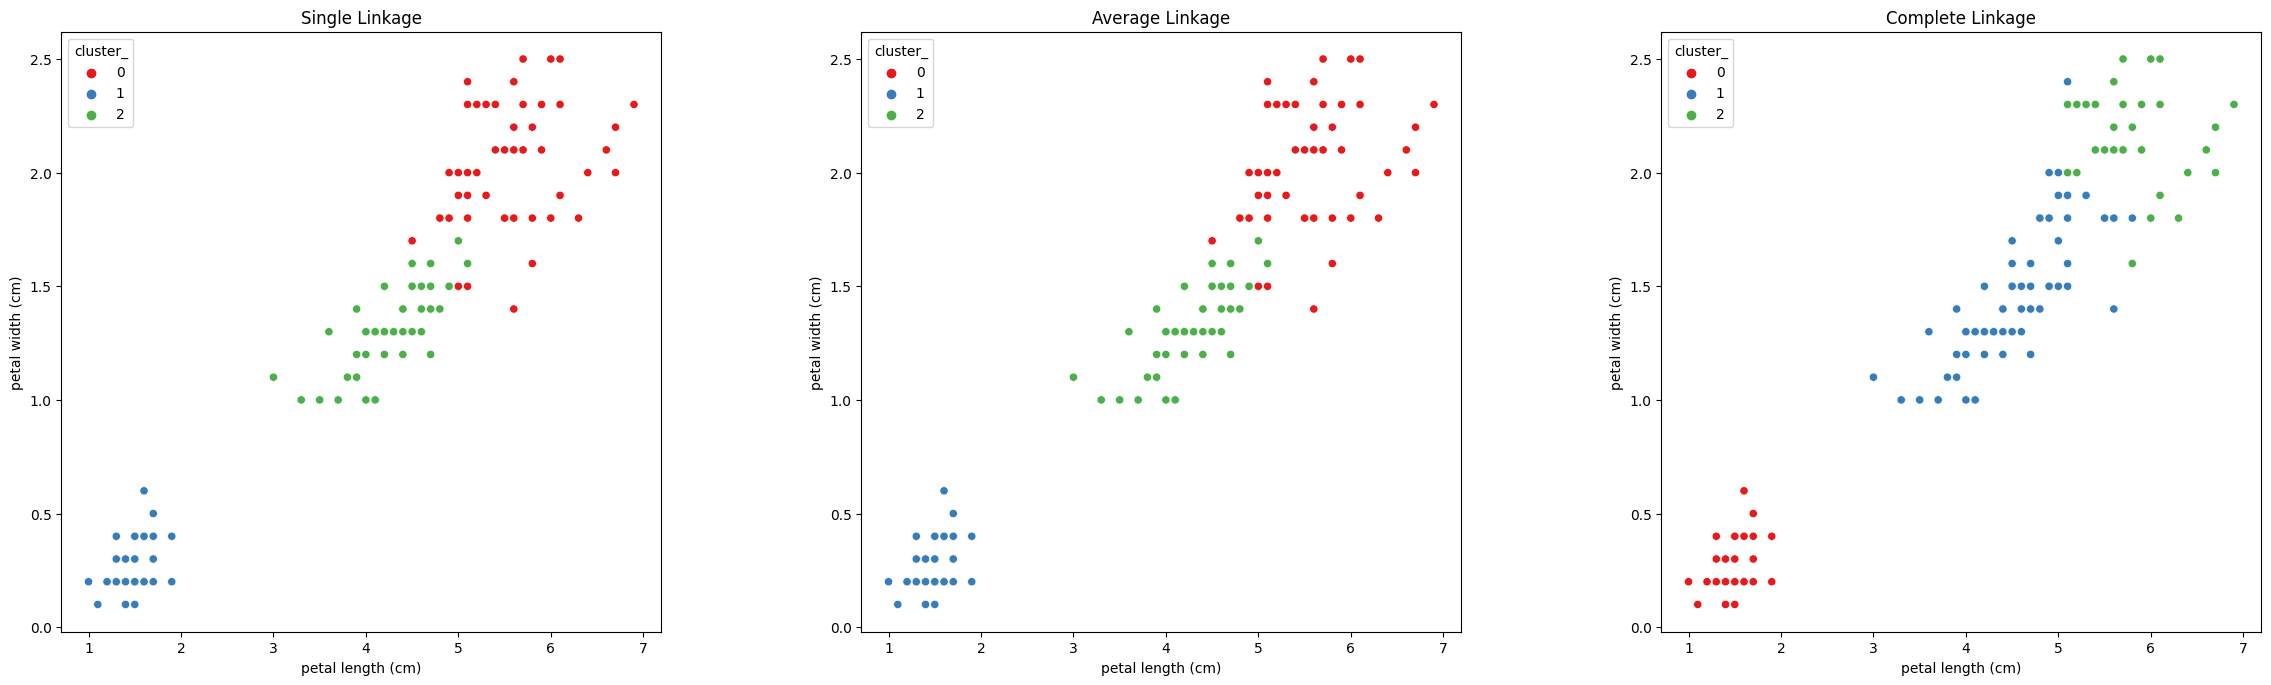

In [53]:
#Plot single_df and avg_df side-by-side
fig = plt.figure(figsize=(20,10))

#Single Linkage
#Give title and show the dendrogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_', data=single_pdf, palette='Set1')
ax1.set_title('Single Linkage')

#Average Linkage
#Give title and show the dendrogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_', data=avg_pdf, palette='Set1')
ax2.set_title('Average Linkage')

#Complete Linkage
#Give title and show the dendrogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_', data=complete_pdf, palette='Set1')
ax3.set_title('Complete Linkage')
plt.show()

**Perbedaan Agglomerative Clustering Menggunakan Scipy dan Scikit-Learn dengan Single Linkage dan Average Linkage**

Di dalam metode single linkage dan average linkage tidak terdapat perbedaan hasil clustering. Perbedaan terlihat pada saat menggunakan metode complete linkage. Pada complete linkage, terlihat jumlah cluster1 adalah 70 dan cluster 2 adalah 30, sedangkan pada single linkage dan average linkage, jumlah cluster 1 adalah 50 dan cluster 2 adalah 50.